# Logistic Regression and Regularization

I model the logistic regression using a built-in optimizer and scikit-learn logistic regression solver. Check out the linear regression for my implementation of gradient descent.


This notebook doesn't analyze the results of the regression, instead it just shows how to use logistic regression to classify data.

$\\$

Import useful packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import special, optimize, io
%matplotlib inline

from __future__ import division


import sklearn.linear_model as lm
from sklearn import preprocessing

import seaborn as sns
sns.set_context('poster')
sns.set_color_codes()

C:\Users\TJ\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


$\\$


$\\$


## Binary Logistic Classification

$\\$ 

Import the data!

In [3]:
admitted_data = pd.read_csv('ex2data1.txt', names = ['Exam1', 'Exam2', 'Admitted'])
admitted_data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


$\\$

Define $X$ as the matrix of values of explanatory variables matrix, and $y$ as the observed responses. 

In [4]:
X = admitted_data.ix[:,:2]
y = admitted_data.Admitted

$\\$

Since there are only two explantory variables, we can plot the data. 

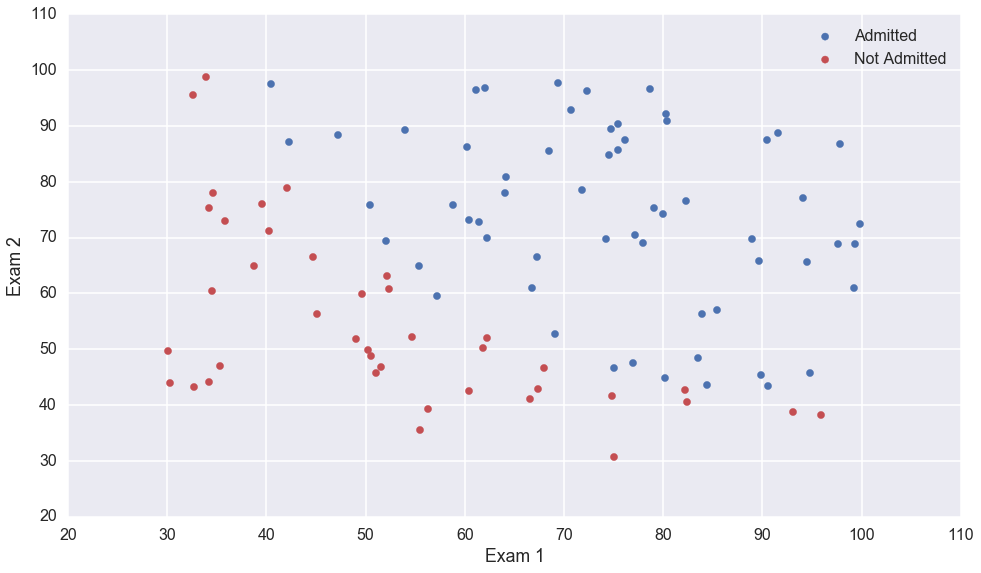

In [5]:
fig, ax = plt.subplots(figsize = (16,9))

admit = admitted_data[admitted_data.Admitted == 1]
not_admit = admitted_data[admitted_data.Admitted == 0]

ax.scatter(admit.Exam1, admit.Exam2, s = 50,color = 'b', label = "Admitted")
ax.scatter(not_admit.Exam1, not_admit.Exam2, s = 50,color = 'r', label = "Not Admitted")
ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

$\\$
Define the logistic cost function, since we are just fitting a linear fit, there is no need for regularization.

In [6]:
sigmoid = special.expit
def cost(coeff, _X, _y, regularization = 0):
    
    # Add column of 0's if it doesnt exist
    if 'CONSTANT_TERM' not in _X.columns:
        _X.insert(0,"CONSTANT_TERM",np.ones(len(_X)))
    
    # define regularization cost
    reg_cost = regularization * sum(coeff**2) 
    
    # define fitness cost
    fit_cost = (-1/len(_y)) * (np.log(sigmoid(_X.dot(coeff))).T.dot(_y) + np.log(1- sigmoid(_X.dot(coeff))).T.dot(1-_y))
    
    # return sum
    return reg_cost + fit_cost


$\\$

Use the built in scipy optimize method (downhill simplex) to descend the cost function to optimize. 

In [7]:
_X = X.copy() # so we can pass by value
coeff = optimize.fmin(cost, [0,0,0], args=(_X,y))
print coeff

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
[-25.16130062   0.20623142   0.20147143]


$\\$

We can also use scikit learn to fit the regression. Scikit learn automatically includes an inverse regularization parameter, $C$, so we make it very large so we can compare the fit given by scikit learn and our own cost function. As you can see they both give the same coefficients!

In [8]:
model = lm.LogisticRegression(C = 10e9)
model.fit(admitted_data.ix[:,:2],admitted_data.Admitted)
print model.intercept_ ,model.coef_

[-24.9560464] [[ 0.20459008  0.19981009]]


$\\$

We can now plot our decision boundary. The boundary is 

$$g(\theta^TX) = \frac{1}{2}$$

where $g$ is the sigmoid function. To plot this we can define a mesh for $X_1$ and $X_2$ and plot the contour for $\frac{1}{2}$

In [9]:
# Define Mesh
xx, yy = np.mgrid[30:100:.05, 30:100:.05]

# Predict probability for each point in the mesh
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

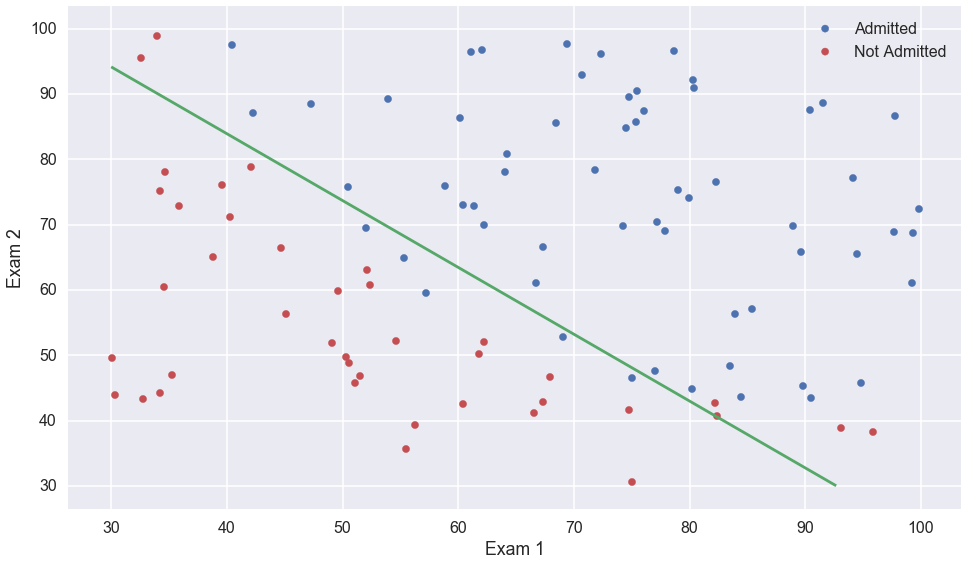

In [10]:
fig, ax = plt.subplots(figsize = (16,9))

admit = admitted_data[admitted_data.Admitted == 1]
not_admit = admitted_data[admitted_data.Admitted == 0]

ax.scatter(admit.Exam1, admit.Exam2, s = 50,color = 'b', label = "Admitted")
ax.scatter(not_admit.Exam1, not_admit.Exam2, s = 50,color = 'r', label = "Not Admitted")

ax.contour(xx,yy,Z, levels = [.5], colors = 'g')

ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

$\\$

Looking at the plot, we see that we could do better with a second degree polynomail decision boundary. Scikit learn makes this easy.

In [11]:
polyFeat = preprocessing.PolynomialFeatures(degree =2)

# This fit_transform returns a matrix with the 2nd degree poly terms
Xdeg2 = polyFeat.fit_transform(X)

# We can fit the 2nd degree polynomial now
model.fit(Xdeg2, y)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

$\\$

Plot the new polynomial fit. It fits perfectly!

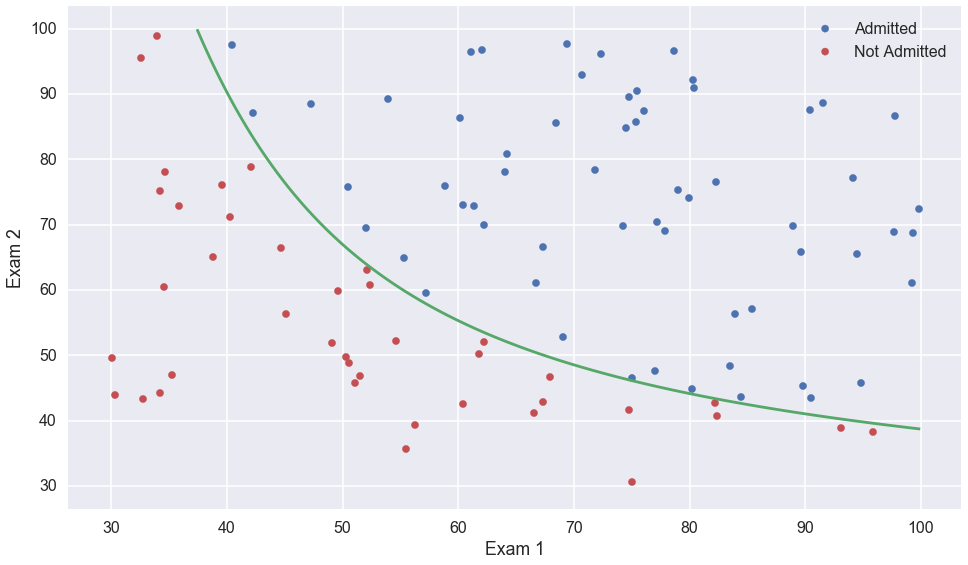

In [12]:
xx, yy = np.mgrid[30:100:.05, 30:100:.05]
Z = model.predict_proba(polyFeat.fit_transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1].reshape(xx.shape)

fig, ax = plt.subplots(figsize = (16,9))

admit = admitted_data[admitted_data.Admitted == 1]
not_admit = admitted_data[admitted_data.Admitted == 0]

ax.scatter(admit.Exam1, admit.Exam2, s = 50,color = 'b', label = "Admitted")
ax.scatter(not_admit.Exam1, not_admit.Exam2, s = 50,color = 'r', label = "Not Admitted")

ax.contour(xx,yy,Z, levels = [.5], colors = 'g')

ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

$\\$

Read in and plot the second data set

In [13]:
data2 = pd.read_csv('ex2data2.txt', names=['Test1','Test2','Success'])

data2.head()


,Test1,Test2,Success
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


$\\$

Plot the data. Notice the very nonlinear behavior. In these situations a different clustering algorithm might be best, but since there are only two explanitory variables, a polynomial logistic regression will work fine

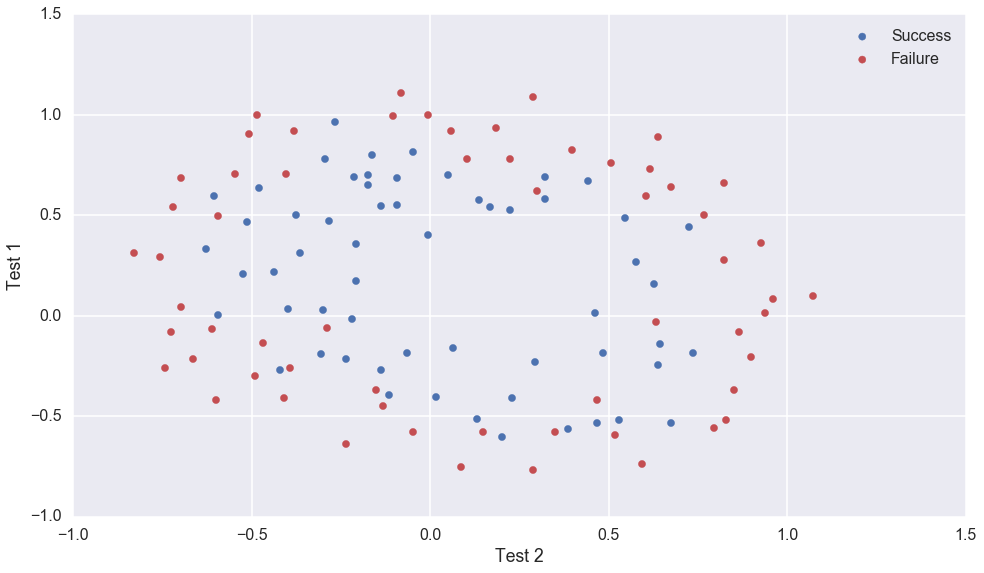

In [14]:
successes = data2[data2.Success == 1]
fail = data2[data2.Success == 0]

fig, ax = plt.subplots(figsize = (16,9))

ax.scatter(successes.Test1, successes.Test2, color = 'b', s = 50, label = 'Success')
ax.scatter(fail.Test1, fail.Test2, color = 'r', s = 50, label = 'Failure')
ax.set_ylabel('Test 1')
ax.set_xlabel('Test 2')
ax.legend()

$\\$

Using no regularization and a 6th degree polynomial transform of the explanitory matrix, fit the data

In [15]:
# Transform data to include all 6th degree polynomial terms
polyFeat = preprocessing.PolynomialFeatures(degree= 6)

$\\$

Plot the fit. Notice with no regularization the data is way overfitted. While the model fits the current data well, it will clearly not predict well.

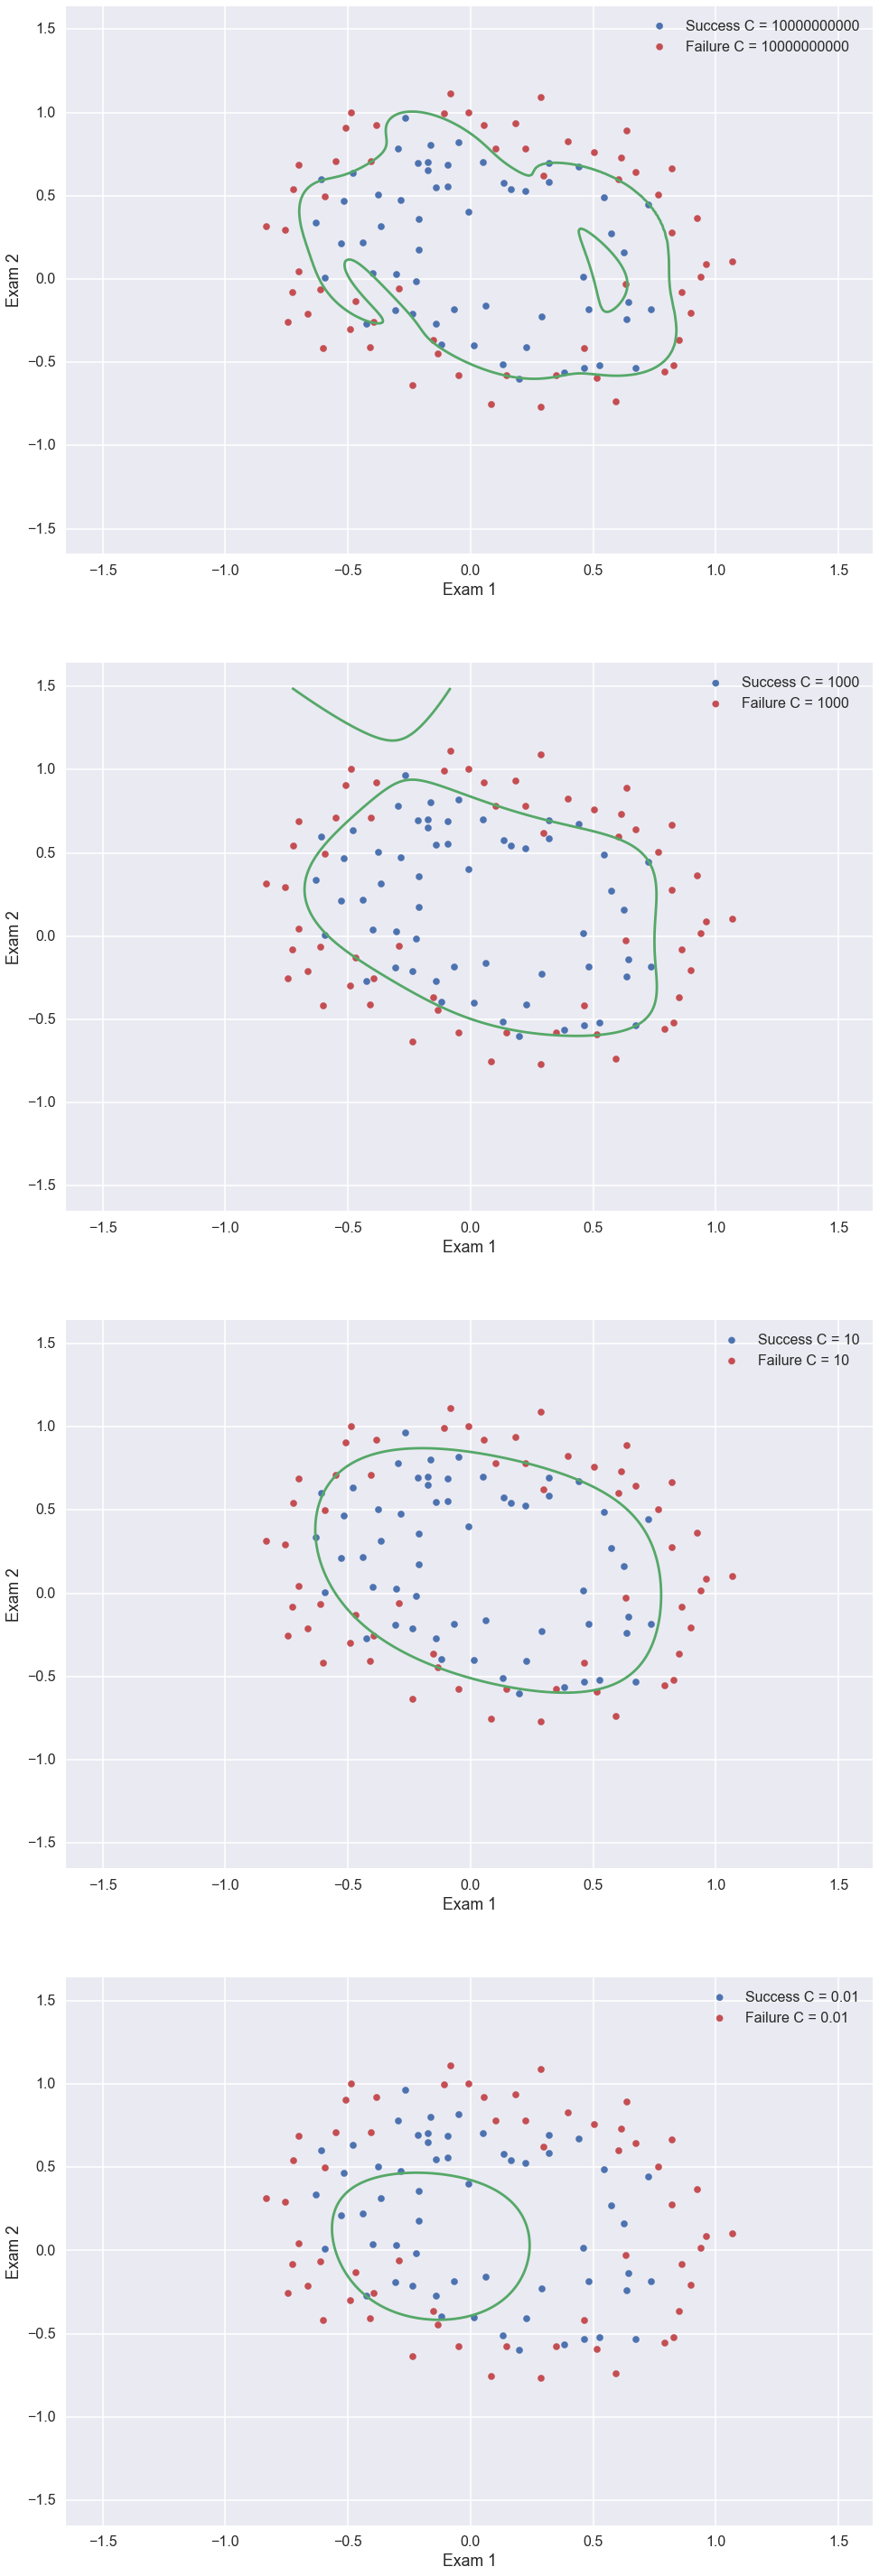

In [22]:
Cs = [10**10, 1000, 10,.01]

fig, ax = plt.subplots(4,1, figsize=(16,50))

for i in range(4):
    
    
    model = lm.LogisticRegression(C = Cs[i])
    model.fit(polyFeat.fit_transform(data2.ix[:,:2]),data2.Success)


    xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
    Z = model.predict_proba(polyFeat.fit_transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1].reshape(xx.shape)



    admit = admitted_data[admitted_data.Admitted == 1]
    not_admit = admitted_data[admitted_data.Admitted == 0]

    ax[i].scatter(successes.Test1, successes.Test2, color = 'b', s = 50, label = 'Success C = ' + str(Cs[i]))
    ax[i].scatter(fail.Test1, fail.Test2, color = 'r', s = 50, label = 'Failure C = '+ str(Cs[i]))

    ax[i].contour(xx,yy,Z, levels = [.5], colors = 'g')

    ax[i].legend()
    ax[i].set_xlabel("Exam 1")
    ax[i].set_ylabel("Exam 2")

We see that C = 10 looks to be the best regularization. This graphical technique works fine for low dimensions, but obviously can't be used for higher dimensions. The right way to select the best regularization constant is to optimize over training, validation, and testing data (select regularization on validation).



$\\$


$\\$


$\\$

$\\$



## Multiclass Logistic Classification

$\\$

The data is in a matlab file, luckily scipy has a function for that (https://xkcd.com/353/)

In [32]:
data = io.loadmat('ex3data1.mat')

$\\$ 

The data has the training images in a matrix called 'X'. It is a 5000x400 matrix where each row is a raveled 20x20 image of a hand drawn number. The data also comes with a 5000x1 vector with the actual digit.

In [33]:
trainingImages = data['X']

# Send every element with 10 to 0 -> original data uses ten because of matlab indexing
# digit = np.array([0 if elem == 10 else elem for elem in np.concatenate(data['y'])])
digit = np.array([[0] if elem == 10 else elem for elem in data['y']])

$\\$

Lets check out some of the examples of the hand drawn data!!  

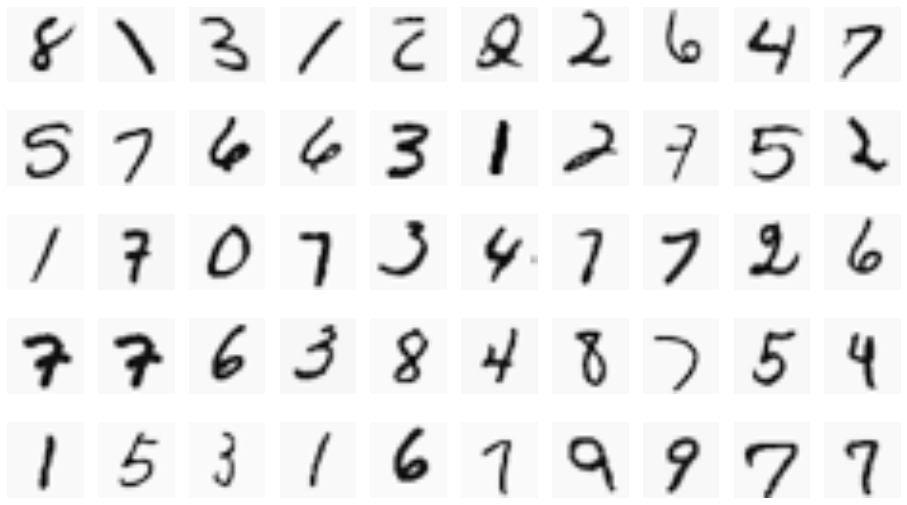

In [34]:
fig, ax = plt.subplots(5,10, figsize=(16,9))


for i in range(5):
    for j in range(10):
        ax[i,j].grid(False)
        ax[i,j].set_xticklabels([])
        ax[i,j].set_yticklabels([])
        ax[i,j].imshow(trainingImages[np.random.randint(5000),:].reshape(20,20).T)


$\\$

We will classify all the handwritten digits using the 'one versus rest' logistic regression technique. Scikit-learn actually has this built into their logistic regression class. However, the whole point of going through these exercises is to learn! I already implemented my the binary logistic qualifier earlier, so I used scikit-learns binary logistic regression and my own 'one versus rest' qualifier.

In [35]:
def ova(X,y):
    '''
        Performs one versus all classifer with logistic regression,
        
        Params
        X: data matrix
        y: sample matrix
    '''
    
    # Initialize model
    model = lm.LogisticRegression()
    
    # Initialize max values
    records = np.zeros(len(y))
    fit = np.zeros(len(y))
    
    # For each unique label (class) in the observations
    for label in np.unique(y):
        
        # Fit a regression for the class, and predict the probabilities (only grabbing prob that x is pos)
        new_fit = model.fit(X, [1 if obsv == label else 0 for obsv in y]).predict_proba(X)[:,1]       
        
        for i in range(len(y)):
            
            # Replace records/fit with new records
            if new_fit[i]>records[i]:
                records[i] = new_fit[i]
                fit[i] = label
                
    return fit


$\\$

Lets run and time the regressions and see how my implementation compares! It's not too much slower and the fit is the same, success!

In [36]:
%timeit ova(trainingImages, digit.ravel())
custom = ova(trainingImages, digit.ravel())

1 loops, best of 3: 5.01 s per loop


In [37]:
model = lm.LogisticRegression()
%timeit model.fit(trainingImages, digit.ravel()).predict(trainingImages)
builtin = model.fit(trainingImages, digit.ravel()).predict(trainingImages)

1 loops, best of 3: 5.11 s per loop


In [38]:
sum(builtin != custom)

0

$\\$

Overall the method worked pretty well, a 94% success rate!

In [39]:
model.score(trainingImages, digit.ravel())

0.94379999999999997

$\\$

If possible it is always good pratice to explore your result. We plot a sample of the numbers we did not classify correctly using logistic regression.  IDK about you, but I could definitely see how some of these were misclassified. 

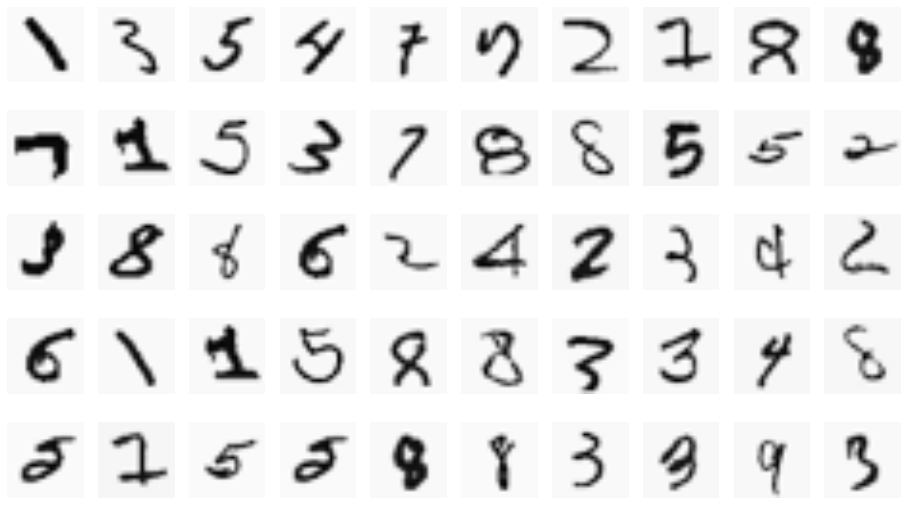

In [40]:
# Get the rows that were classified incorrectly (logical indexing)
wrong = trainingImages[builtin != digit.ravel(),:]

fig, ax = plt.subplots(5,10, figsize=(16,9))


for i in range(5):
    for j in range(10):
        ax[i,j].grid(False)
        ax[i,j].set_xticklabels([])
        ax[i,j].set_yticklabels([])
        ax[i,j].imshow(wrong[np.random.randint(wrong.shape[0]),:].reshape(20,20).T)


Pretty cool =D